In [1]:
pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 1.6 MB/s 
     |████████████████████████████████| 232 kB 13.6 MB/s 
     |████████████████████████████████| 51 kB 5.9 MB/s 
     |████████████████████████████████| 4.2 MB 46.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.6 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 38.3 MB/s 
     |████████████████████████████████| 596 kB 68.5 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=81fa51032f6aeb2fd02ea5a288fb03504c9396f0c00f6eb282e0152666e07837
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=dfde310a28e9fb4a6dafc3d46a3ea335286a5b0ed4e667e3cb539e09dcc8dc28
  S

**i  don't use the nlp pipeline like stopword removal, lemetization,stemming etc. because these thing are not mentioned in assignment.**

**keywords generation using kerbert.**

In [2]:
from keybert import KeyBERT

doc = """
         What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [3]:
 kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)

[('housing', 0.44),
 ('spillovers', 0.3775),
 ('house', 0.3548),
 ('inflation', 0.3372),
 ('metropolitan', 0.2555)]

In [4]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), stop_words=None)

[('house prices', 0.6108),
 ('house price', 0.5794),
 ('housing costs', 0.5422),
 ('housing', 0.44),
 ('price growth', 0.4341)]

In [5]:
keywords = kw_model.extract_keywords(doc, highlight=True)

What explains record U.S. house price growth since late 2019? We show that the shift to 
remote work explains over one half of the 23.8 percent national house price increase over 
this period. Using variation in remote work exposure across U.S. metropolitan areas we 
estimate that an additional percentage point of remote work causes a 0.93 percent increase in
house prices after controlling for negative spillovers from migration. This cross-sectional 
estimate combined with the aggregate shift to remote work implies that remote work raised 
aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice
we argue that this estimate is a lower bound on the aggregate effect. Our results imply a 
fundamentals-based explanation for the recent increases in housing costs over speculation or 
financial factors, and that the evolution of remote work is likely to have large effects on 
the future path of house prices and inflation.

Max Sum Similarity

In [6]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_maxsum=True, nr_candidates=20, top_n=5)

[('record house price', 0.3689),
 ('explanation recent increases', 0.3938),
 ('speculation financial factors', 0.4029),
 ('percent national house', 0.4088),
 ('negative spillovers migration', 0.4229)]

Maximal Marginal Relevance

In [7]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.7)

[('house price growth', 0.6423),
 ('work implies remote', 0.2145),
 ('spillovers migration cross', 0.3329),
 ('explains half 23', 0.0388),
 ('aggregate effect results', 0.2456)]

low diversity:

In [8]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.2)

[('house price growth', 0.6423),
 ('housing costs speculation', 0.6038),
 ('recent increases housing', 0.5926),
 ('house price increase', 0.628),
 ('house prices inflation', 0.584)]

In [9]:
doc1=""" 
        It used to be an anomaly, now it’s common place. It’s not remote work, it’s just work. We will surly laugh at ourselves in 20 years the same way we laugh at seeing people with big car phones in movies from the 80s—there are no car phones or house phones just a (cell) phone.

        This is the age of connected work. There is no here vs there, everywhere is here. If there is no office, all there is to design around is people and the connections that enable them to work together.


     """

In [10]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc1)

In [65]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(1, 1), stop_words=None)

[('phones', 0.39),
 ('office', 0.387),
 ('remote', 0.319),
 ('phone', 0.3038),
 ('everywhere', 0.2702)]

In [11]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(1, 2), stop_words=None)

[('remote work', 0.4999),
 ('cell phone', 0.4314),
 ('house phones', 0.4298),
 ('phones just', 0.4286),
 ('no office', 0.427)]

In [12]:
keywords = kw_model.extract_keywords(doc1, highlight=True)

It used to be an anomaly, now it’s common place. It’s not remote work, it’s just work. We 
will surly laugh at ourselves in 20 years the same way we laugh at seeing people with big car
phones in movies from the 80s—there are no car phones or house phones just a (cell) phone. 
This is the age of connected work. There is no here vs there, everywhere is here. If there is
no office, all there is to design around is people and the connections that enable them to 
work together.

Max Sum Similarity

In [13]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_maxsum=True, nr_candidates=20, top_n=5)

[('work surly laugh', 0.3126),
 ('car phones movies', 0.3176),
 ('vs office design', 0.3474),
 ('phone age connected', 0.3531),
 ('common place remote', 0.4558)]

Maximal Marginal Relevance

In [14]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.7)

[('remote work just', 0.5266),
 ('cell phone age', 0.3564),
 ('anomaly common place', 0.2657),
 ('way laugh seeing', 0.119),
 ('people connections enable', 0.2916)]

low diversity:


In [15]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.2)

[('remote work just', 0.5266),
 ('car phones house', 0.4266),
 ('common place remote', 0.4558),
 ('phones just cell', 0.4607),
 ('work vs office', 0.4229)]

**similarity between two notes**

In [16]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
documents = ['What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.',
             'It used to be an anomaly, now it’s common place. It’s not remote work, it’s just work. We will surly laugh at ourselves in 20 years the same way we laugh at seeing people with big car phones in movies from the 80s—there are no car phones or house phones just a (cell) phone.This is the age of connected work. There is no here vs there, everywhere is here. If there is no office, all there is to design around is people and the connections that enable them to work together.'
]

In [18]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', 0)

In [19]:
documents_df=pd.DataFrame(documents,columns=['documents'])

**Corpus Dataframe**

In [20]:
documents_df

,documents
0,"What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation."
1,"It used to be an anomaly, now it’s common place. It’s not remote work, it’s just work. We will surly laugh at ourselves in 20 years the same way we laugh at seeing people with big car phones in movies from the 80s—there are no car phones or house phones just a (cell) phone.This is the age of connected work. There is no here vs there, everywhere is here. If there is no office, all there is to design around is people and the connections that enable them to work together."


In [21]:
stop_words_l=stopwords.words('english')
documents_df['documents_cleaned']=documents_df.documents.apply(lambda x: " ".join(re.sub(r'[^a-zA-Z]',' ',w).lower() for w in x.split() if re.sub(r'[^a-zA-Z]',' ',w).lower() not in stop_words_l) )


**Tf-idf vectors**

In [22]:
tfidfvectoriser=TfidfVectorizer(max_features=64)
tfidfvectoriser.fit(documents_df.documents_cleaned)
tfidf_vectors=tfidfvectoriser.transform(documents_df.documents_cleaned)

In [23]:
tfidf_vectors.shape

(2, 64)

In [24]:
tfidf_vectors=tfidf_vectors.toarray()
print (tfidf_vectors[0])

[0.08212517 0.24637551 0.         0.         0.08212517 0.
 0.08212517 0.08212517 0.         0.         0.         0.08212517
 0.08212517 0.08212517 0.24637551 0.16425034 0.29216367 0.16425034
 0.         0.08212517 0.         0.08212517 0.08212517 0.08212517
 0.08212517 0.08212517 0.         0.08212517 0.08212517 0.
 0.08212517 0.08212517 0.         0.24637551 0.08212517 0.08212517
 0.         0.         0.         0.08212517 0.16425034 0.24637551
 0.08212517 0.08212517 0.08212517 0.40902914 0.08212517 0.08212517
 0.         0.16425034 0.08212517 0.08212517 0.08212517 0.08212517
 0.         0.         0.         0.         0.         0.16425034
 0.08212517 0.         0.         0.40902914]


Every document has been converted into a 64 dimensional vector. As we set the max_features=64

**Pairwise similarity ** 

Pairwise cosine similarity would just be the dot product of the vectors becasue tf-idf vectors from sklearn are already normalized and L2 norm of these vectors is 1. So denominator of cosine similiarity formula is 1 in this case.

In [25]:
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T)
pairwise_differences=euclidean_distances(tfidf_vectors)

In [26]:
print (tfidf_vectors[0])
print (pairwise_similarities.shape)
print (pairwise_similarities[0][:])

[0.08212517 0.24637551 0.         0.         0.08212517 0.
 0.08212517 0.08212517 0.         0.         0.         0.08212517
 0.08212517 0.08212517 0.24637551 0.16425034 0.29216367 0.16425034
 0.         0.08212517 0.         0.08212517 0.08212517 0.08212517
 0.08212517 0.08212517 0.         0.08212517 0.08212517 0.
 0.08212517 0.08212517 0.         0.24637551 0.08212517 0.08212517
 0.         0.         0.         0.08212517 0.16425034 0.24637551
 0.08212517 0.08212517 0.08212517 0.40902914 0.08212517 0.08212517
 0.         0.16425034 0.08212517 0.08212517 0.08212517 0.08212517
 0.         0.         0.         0.         0.         0.16425034
 0.08212517 0.         0.         0.40902914]
(2, 2)
[1.         0.21630017]


similarity is highest, 1 at index 0 becasue they are the same documents

In [27]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {documents_df.iloc[doc_id]["documents"]}')
    print ('\n')
    print (f'Similar Documents using {matrix}:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {documents_df.iloc[ix]["documents"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

In [28]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Cosine 

In [29]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Euclide

**word2vec embeddings**

In [30]:
from keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(documents_df.documents_cleaned)
tokenized_documents=tokenizer.texts_to_sequences(documents_df.documents_cleaned)
tokenized_paded_documents=pad_sequences(tokenized_documents,maxlen=64,padding='post')
vocab_size=len(tokenizer.word_index)+1

print (tokenized_paded_documents[0])

[ 2  1 38  6 15  4  8 39 40 41 42 43 44  7 45  9 14  2  1 46  2  1 47  9
  5  3  4  8  6 16 48  2  1 49 50 51  7 52 53  9 54 55 56 57 58 59 60 61
 62 63 64 65 66 67  2  1 68 69 70 71 72  4  8 73]


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import gensim
W2V_PATH="/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz"
model_w2v = gensim.models.KeyedVectors.load_word2vec_format(W2V_PATH, binary=True)

In [34]:
 
embedding_matrix=np.zeros((vocab_size,300))
for word,i in tokenizer.word_index.items():
    if word in model_w2v:
        embedding_matrix[i]=model_w2v[word]

In [35]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
embedding_matrix[tokenizer.word_index['house']]

array([ 1.57226562e-01, -7.08007812e-02,  5.39550781e-02, -1.89208984e-02,
        9.17968750e-02,  2.55126953e-02,  7.37304688e-02, -5.68847656e-02,
        1.79687500e-01,  9.27734375e-02,  9.03320312e-02, -4.12109375e-01,
       -8.30078125e-02, -1.45507812e-01, -2.37304688e-01, -3.68652344e-02,
        8.74023438e-02, -2.77099609e-02,  1.13677979e-03,  8.30078125e-02,
        3.57421875e-01, -2.61718750e-01,  7.47070312e-02, -8.10546875e-02,
       -2.35595703e-02, -1.61132812e-01, -4.78515625e-02,  1.85546875e-01,
       -3.97949219e-02, -1.58203125e-01, -4.37011719e-02, -1.11328125e-01,
       -1.05957031e-01,  9.86328125e-02, -8.34960938e-02, -1.27929688e-01,
       -1.39648438e-01, -1.86523438e-01, -5.71289062e-02, -1.17675781e-01,
       -1.32812500e-01,  1.55639648e-02,  1.34765625e-01,  8.39843750e-02,
       -9.03320312e-02, -4.12597656e-02, -2.51953125e-01, -2.27539062e-01,
       -6.64062500e-02, -7.66601562e-02,  5.15136719e-02,  5.90820312e-02,
        3.49609375e-01, -

In [37]:

document_word_embeddings=np.zeros((len(tokenized_paded_documents),64,300))

for i in range(len(tokenized_paded_documents)):
    for j in range(len(tokenized_paded_documents[0])):
        document_word_embeddings[i][j]=embedding_matrix[tokenized_paded_documents[i][j]]

In [38]:
document_word_embeddings.shape

(2, 64, 300)

In [39]:


document_embeddings=np.zeros((len(tokenized_paded_documents),300))
words=tfidfvectoriser.get_feature_names()

for i in range(len(document_word_embeddings)):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)

In [40]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [41]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Cosine 

In [42]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Euclide

In [43]:
embeddings_index = dict()
with open("/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    

In [44]:
embedding_matrix=np.zeros((vocab_size,100))

for word,i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [45]:


document_embeddings=np.zeros((len(tokenized_paded_documents),100))
words=tfidfvectoriser.get_feature_names()

for i in range(documents_df.shape[0]):
    for j in range(len(words)):
        document_embeddings[i]+=embedding_matrix[tokenizer.word_index[words[j]]]*tfidf_vectors[i][j]
        
document_embeddings=document_embeddings/np.sum(tfidf_vectors,axis=1).reshape(-1,1)

In [46]:
document_embeddings.shape

(2, 100)

In [47]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [48]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Cosine 

In [49]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Euclide

**Doc2vec model**

In [50]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [51]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(documents_df.documents_cleaned)]

In [52]:
model_d2v = Doc2Vec(vector_size=100,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)

In [53]:
document_embeddings=np.zeros((documents_df.shape[0],100))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]

In [54]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [55]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Cosine 

In [56]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Euclide

**BERT model**

In [57]:
from sentence_transformers import SentenceTransformer

In [58]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [59]:
document_embeddings = sbert_model.encode(documents_df['documents_cleaned'])

In [60]:
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

In [61]:
most_similar(0,pairwise_similarities,'Cosine Similarity')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Cosine 

In [62]:
most_similar(0,pairwise_differences,'Euclidean Distance')

Document: What explains record U.S. house price growth since late 2019? We show that the shift to remote work explains over one half of the 23.8 percent national house price increase over this period. Using variation in remote work exposure across U.S. metropolitan areas we estimate that an additional percentage point of remote work causes a 0.93 percent increase in house prices after controlling for negative spillovers from migration. This cross-sectional estimate combined with the aggregate shift to remote work implies that remote work raised aggregate U.S. house prices by 15.1 percent. Using a model of remote work and location choice we argue that this estimate is a lower bound on the aggregate effect. Our results imply a fundamentals-based explanation for the recent increases in housing costs over speculation or financial factors, and that the evolution of remote work is likely to have large effects on the future path of house prices and inflation.


Similar Documents using Euclide

**(STRETCH GOAL) Given a note, can you suggest a set of tags for it. Because we know how related tags are, and have an idea of the tags we can generate for a particular document, can we use a measure to suggest a user tags for a document (As a basic example, you could treat tags as vectors and find similarities in this vector space)**

In [63]:
import os
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In [64]:
embeddings_index = dict()
with open("/content/drive/MyDrive/Colab Notebooks/glove.6B.100d.txt") as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    

In [69]:
def find_similar_word(emmbedes):
  nearest = sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], emmbedes))
  return nearest

In [70]:
find_similar_word(embeddings_index['house'])[0:10]

['house',
 'office',
 'room',
 'capitol',
 'houses',
 'mansion',
 'once',
 'home',
 'senate',
 'building']

In [71]:
find_similar_word(embeddings_index['spillovers'])[0:10]

['spillovers',
 'non-aryans',
 'binomials',
 'off-target',
 'seepages',
 'defensives',
 'caustics',
 'repurcussions',
 'demoralisation',
 'pollutions']

In [72]:
find_similar_word(embeddings_index['inflation'])[0:10]

['inflation',
 'rates',
 'rate',
 'deflation',
 'rising',
 'rise',
 'inflationary',
 'slowing',
 'unemployment',
 'growth']

In [73]:
find_similar_word(embeddings_index['metropolitan'])[0:10]

['metropolitan',
 'metro',
 'newark',
 'minneapolis',
 'municipal',
 'city',
 'spgfld',
 'urban',
 'richmond',
 'suburbs']

In [74]:
find_similar_word(embeddings_index['phones'])[0:10]

['phones',
 'telephones',
 'cellphones',
 'cellphone',
 'handsets',
 'phone',
 'laptops',
 'computers',
 'mobile',
 'pagers']

In [75]:
find_similar_word(embeddings_index['office'])[0:10]

['office',
 'offices',
 'post',
 'house',
 'administration',
 'department',
 'official',
 'recently',
 'public',
 'headquarters']

In [76]:
find_similar_word(embeddings_index['remote'])[0:10]

['remote',
 'mountainous',
 'isolated',
 'rugged',
 'location',
 'areas',
 'proximity',
 'terrain',
 'tiny',
 'parts']

In [77]:
find_similar_word(embeddings_index['everywhere'])[0:10]

['everywhere',
 'nowhere',
 'anymore',
 'anyway',
 'wherever',
 'else',
 'anywhere',
 'sight',
 'indeed',
 'happening']

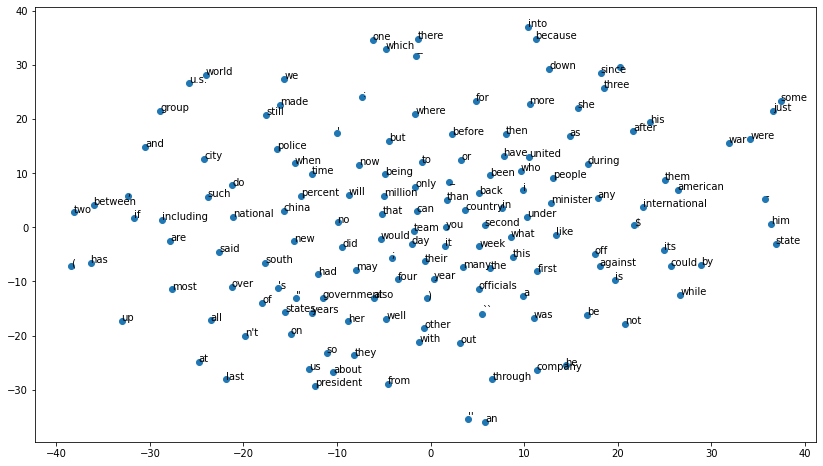

In [78]:
distri = TSNE(n_components=2)
words = list(embeddings_index.keys())
vectors = [embeddings_index[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()